In [1]:
get_ipython().system('pip install spacy')

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107101 sha256=a80250e2fd49ec66811be42696def134537c33db44520b011862891eefec532d
  Stored in directory: c:\users\akshay\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open


In [2]:
get_ipython().system('pip install wordcloud')

In [7]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [8]:
musk=pd.read_csv("Elon_musk.csv", sep=',', encoding='latin-1')
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
train,test = train_test_split(musk,test_size=0.1)

In [10]:
train

,Unnamed: 0,Text
1550,1551,History is written by the victors except on ...
1703,1704,@matfabrix @engineers_feed Witch logic https:/...
1432,1433,@WholeMarsBlog We were too obtuse for our own ...
1463,1464,"@coach23life I tried to warn them, but they ju..."
393,394,@karpathy Vaccines are just the start. Its al...
...,...,...
66,67,The future currency of Earth
1485,1486,Bureaucracy is inherently kafkaesque
1234,1235,@Neopork85 @SpaceX @MarcusHouseGame We really ...
1423,1424,@flcnhvy @DJSnM Neuralink this month &amp; Tes...


In [11]:
test

,Unnamed: 0,Text
607,608,@enn_nafnlaus @mirojurcevic @TashaARK @Space_S...
1370,1371,"@teslaownersSV @justpaulinelol Sorry, sir I th..."
362,363,@Reza_Zadeh Less?
200,201,RT @SpaceX: Falcon 9s first stage has landed ...
1675,1676,4 mins to Dragon loss of signal due to atmosph...
...,...,...
818,819,Recruiting ace engineers for Giga Berlin! Will...
127,128,"@thejackbeyer @NASASpaceflight Cryoproof, then..."
1214,1215,@flcnhvy @Gfilche @YahooFinance Pretty much
1426,1427,@EvaFoxU That number sure comes up a lot <U+00...


In [12]:
import re

In [13]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [14]:
musk["Text"] = musk["Text"].apply(cleantext)

musk.head()


,Unnamed: 0,Text
0,1,Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [20]:
 spacy.load('en_core_web_md')

In [24]:
from textblob import TextBlob

In [25]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [26]:
musk[["subjectivity", "polarity"]] = musk.apply(sentiment_analysis, axis=1)
musk

,Unnamed: 0,Text,subjectivity,polarity
0,1,Im an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


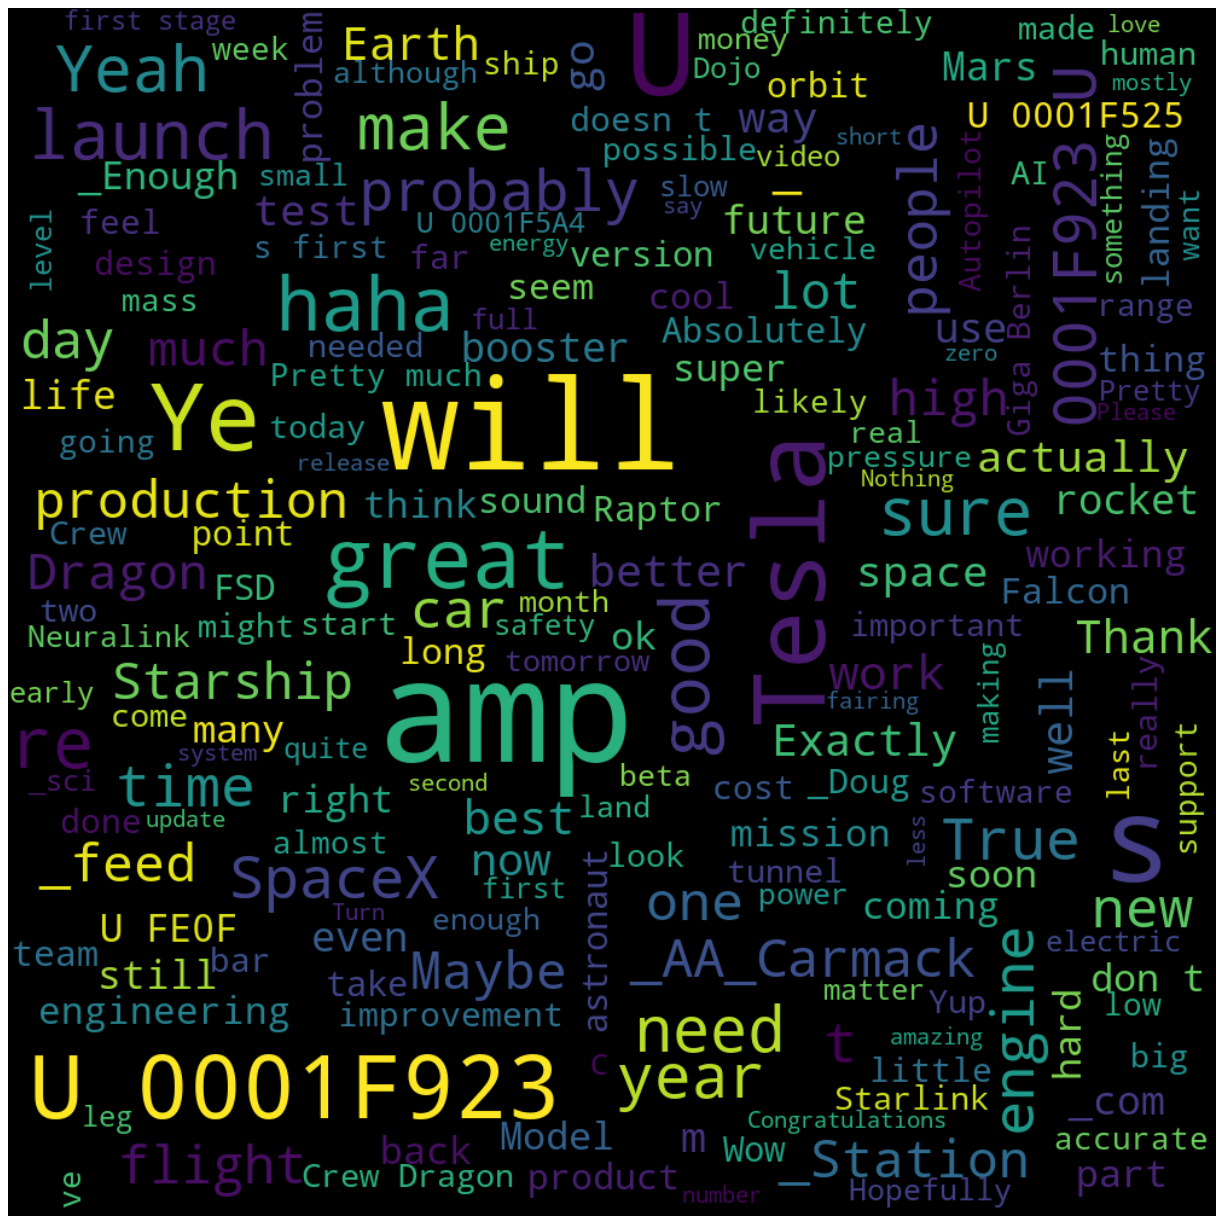

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in musk["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [29]:
musk["analysis"] = musk["polarity"].apply(analysis)


In [30]:
musk

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [31]:
positive_tweets = musk[musk['analysis'] == 'Positive']
negative_tweets = musk[musk['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


In [32]:
musk = musk[['Text','analysis']]
musk

,Text,analysis
0,Im an alien,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,Neutral
2,Great interview!,Positive
3,Doge is underestimated,Neutral
4,Congratulations Tesla China for amazing execu...,Positive
...,...,...
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive
1996,Samwise Gamgee,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,Negative


In [33]:
musk = musk [musk ['analysis']!= 'Neutral']
musk

,Text,analysis
0,Im an alien,Negative
2,Great interview!,Positive
4,Congratulations Tesla China for amazing execu...,Positive
5,Happy New Year of the Ox!,Positive
7,_ Haha thanks :),Positive
...,...,...
1989,"Sorry, should hopefully be soon!",Negative
1991,"No easy way to answer this in a tweet, but he...",Positive
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive


In [34]:
musk.shape

(1103, 2)

In [35]:
musk.dtypes

Text        object
analysis    object
dtype: object

In [36]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1103 non-null   object
 1   analysis  1103 non-null   object
dtypes: object(2)
memory usage: 25.9+ KB


In [37]:
train,test = train_test_split(musk,test_size=0.1)

In [38]:
train

,Text,analysis
1435,Then they leave the house and hardly ever cal...,Negative
1155,Glad SpaceX could help! We are prioritizing ...,Positive
1047,"Waymo is impressive, but a highly specialized...",Positive
1102,Hollywood should just start with the sequel &a...,Positive
1630,Good analysis. He also includes a govt loan ...,Positive
...,...,...
1625,: Videos like this will always amaze me...\n\n...,Negative
1087,Were not seeing notable differences yet. I ...,Positive
717,"Cool, but please be super cautious. Expect tw...",Positive
1952,Welcome anytime,Positive


In [39]:
test

,Text,analysis
112,_Cooney Tom has some great stories about ...,Positive
385,_feed Very important,Positive
1443,Exactly,Positive
1947,Cute,Positive
535,Not bad,Positive
...,...,...
1646,Well do several short hops to smooth out l...,Positive
1709,Starship SN5 just completed full duration stat...,Positive
1323,Vera Rubin Observatory is cool,Positive
153,The esthetics of Cyberpunk are incredible btw....,Positive


In [42]:
for val in train['Text']:
    print (val)

 Then they leave the house and hardly ever call their parents!
  Glad SpaceX could help! We are prioritizing emergency responders &amp; locations with no Internet connectivity at all.
 Waymo is impressive, but a highly specialized solution. The Tesla approach is a general solution. The lat 
Hollywood should just start with the sequel &amp; skip the original, because financials
  Good analysis. He also includes a govt loan for high efficiency vehicles that Tesla paid b 
  Exactly! Woohoo!!
_com Even if half that amount, its still a big deal!
Case closed 
    Yes, it will have huge nuts haha
Will be less roomy with 3 vacuum rocket engines added 
  _max  Yeah, full name of engine is Velociraptor or Raptor for short
What is the general population (no knowledge of symptoms) accuracy of a sars-cov2 PCR test &amp; is it possible to gene 
 A lot of people are going to be super unhappy with West Coast high tech as the de facto arbiter of free speech
   Has to be blue steel :)
Price change i

In [43]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [44]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [48]:
train['Text']


1435     Then they leave the house and hardly ever cal...
1155      Glad SpaceX could help! We are prioritizing ...
1047     Waymo is impressive, but a highly specialized...
1102    Hollywood should just start with the sequel &a...
1630      Good analysis. He also includes a govt loan ...
                              ...                        
1625    : Videos like this will always amaze me...\n\n...
1087      Were not seeing notable differences yet. I ...
717      Cool, but please be super cautious. Expect tw...
1952                                      Welcome anytime
1985                     Wow, IHOP &amp; GitHub are close
Name: Text, Length: 992, dtype: object

In [49]:
def Clean_Text(musk):
    Text = []
    analysis = []
    for index,row in musk.iterrows():
        sentence = re.sub(pattern,'',row.Text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Text.append(words)
        analysis.append(row.analysis)
    return Text,analysis

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKSHAY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AKSHAY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [54]:
train_Text,train_analysis = Clean_Text(train)

In [55]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data

{'tweets': ['leave house hardly ever call parents!',
  'glad spacex could help! prioritizing emergency responder &amp; location internet connectivity all.',
  'waymo impressive, highly specialized solution. tesla approach general solution. lat',
  'hollywood start sequel &amp; skip original, financials',
  'good analysis. also includes govt loan high efficiency vehicle tesla paid b',
  'exactly! woohoo!!',
  '_com even half amount, it\x92s still big deal!',
  'case closed',
  'yes, huge nut haha',
  'le roomy 3 vacuum rocket engine added',
  '_max yeah, full name engine velociraptor raptor short',
  'general population (no knowledge symptoms) accuracy sars-cov2 pcr test &amp; possible gene',
  'lot people going super unhappy west coast high tech de facto arbiter free speech',
  'blue steel :)',
  'price change pushed thursday next week. applies u now. one week clock start countr',
  'near-orbital space fastest way travel long distance earth!',
  '_inc starlink \x93poses hazard\x94 vias

In [56]:
processed_data = pd.DataFrame(final_data)

In [57]:
processed_data

,tweets,sentiments
0,leave house hardly ever call parents!,Negative
1,glad spacex could help! prioritizing emergency...,Positive
2,"waymo impressive, highly specialized solution....",Positive
3,"hollywood start sequel &amp; skip original, fi...",Positive
4,good analysis. also includes govt loan high ef...,Positive
...,...,...
987,: video like always amaze me... astronomer jan...,Negative
988,were seeing notable difference yet. think boo...,Positive
989,"cool, please super cautious. expect two step f...",Positive
990,welcome anytime,Positive


In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [59]:
processed_data

,tweets,sentiments
0,leave house hardly ever call parents!,0
1,glad spacex could help! prioritizing emergency...,1
2,"waymo impressive, highly specialized solution....",1
3,"hollywood start sequel &amp; skip original, fi...",1
4,good analysis. also includes govt loan high ef...,1
...,...,...
987,: video like always amaze me... astronomer jan...,0
988,were seeing notable difference yet. think boo...,1
989,"cool, please super cautious. expect two step f...",1
990,welcome anytime,1


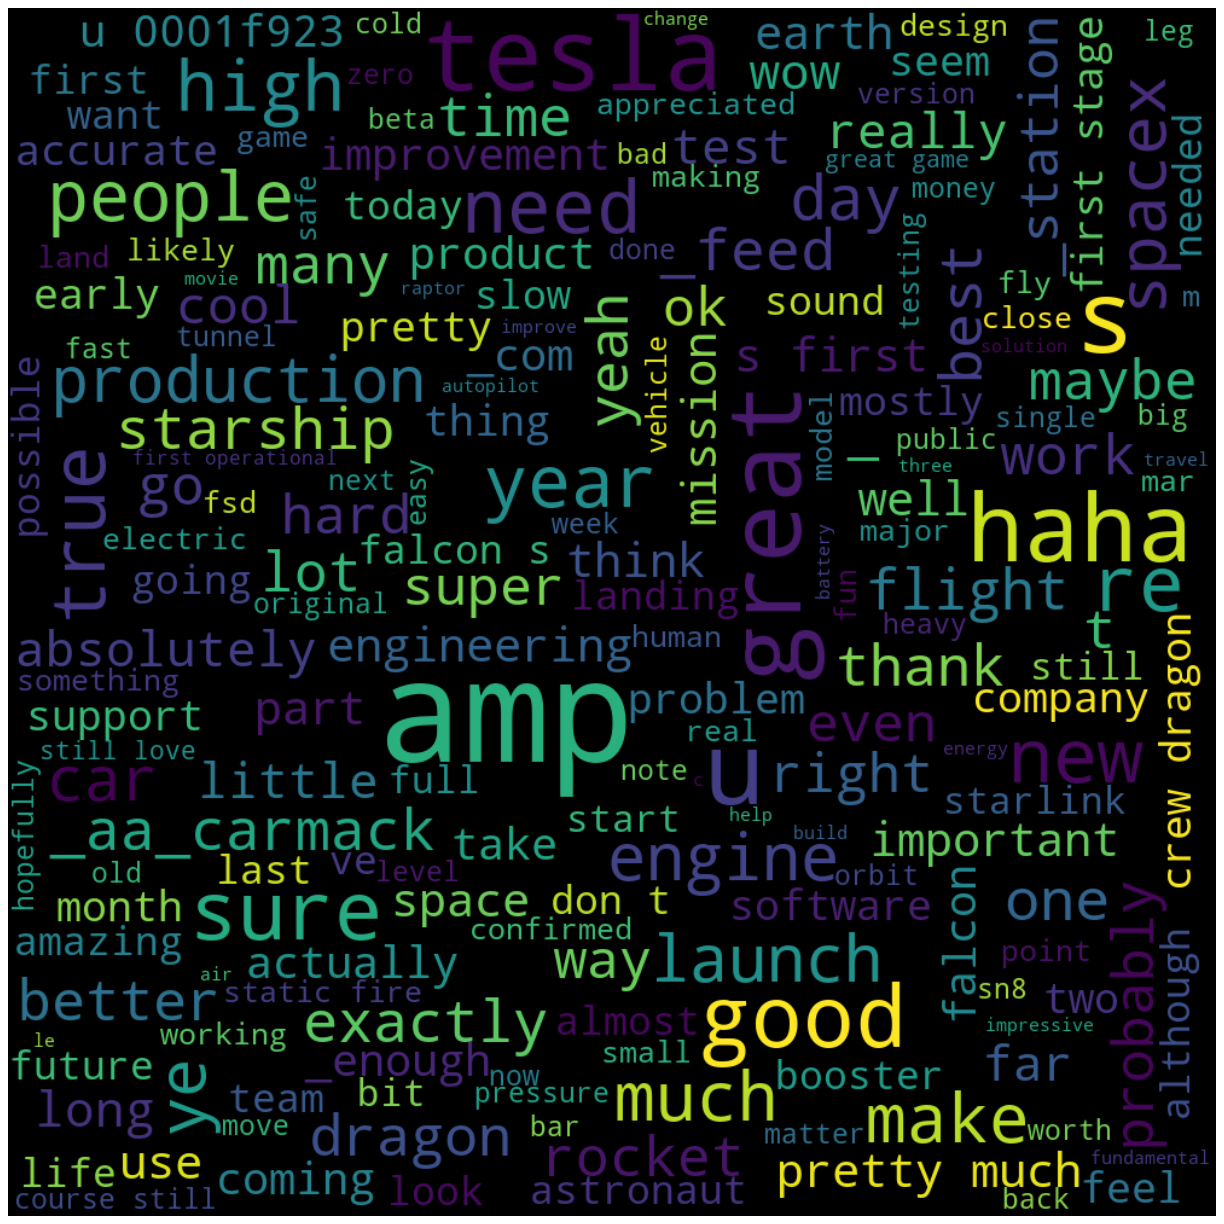

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

C:\Users\AKSHAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiments', ylabel='Density'>

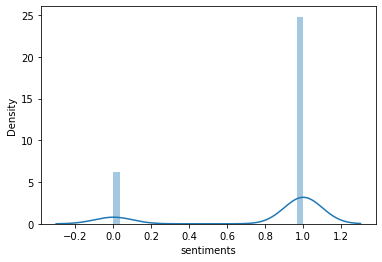

In [61]:
sns.distplot(processed_data['sentiments'])

C:\Users\AKSHAY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiments'>

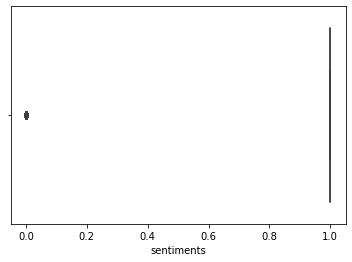

In [62]:
sns.boxplot(processed_data['sentiments'])

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [64]:
X_train = cv.transform(processed_data['tweets'])

In [65]:
print(X_train.shape)

(992, 13296)


In [66]:
X_train

<992x13296 sparse matrix of type '<class 'numpy.int64'>'
	with 17947 stored elements in Compressed Sparse Row format>

In [67]:
target = processed_data['sentiments'].values

In [68]:
target

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [69]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [70]:
classifier.fit(X_train,target)

MultinomialNB()

In [71]:
test_Text,test_analysis = Clean_Text(test)

In [72]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [73]:
final_test_data

,tweets,sentiments
0,_cooney tom great story experim,Positive
1,_feed important,Positive
2,exactly,Positive
3,cute,Positive
4,bad,Positive
...,...,...
106,"well several short hop smooth launch process,...",Positive
107,starship sn5 completed full duration static fi...,Positive
108,vera rubin observatory cool,Positive
109,esthetic cyberpunk incredible btw. interior de...,Positive


In [74]:
X_test = cv.transform(final_test_data['tweets'])

In [75]:
X_test

<111x13296 sparse matrix of type '<class 'numpy.int64'>'
	with 599 stored elements in Compressed Sparse Row format>

In [76]:
X_test.shape

(111, 13296)

In [77]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1])

In [78]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [79]:
final_test_data

,tweets,sentiments
0,_cooney tom great story experim,1
1,_feed important,1
2,exactly,1
3,cute,1
4,bad,1
...,...,...
106,"well several short hop smooth launch process,...",1
107,starship sn5 completed full duration static fi...,1
108,vera rubin observatory cool,1
109,esthetic cyberpunk incredible btw. interior de...,1


In [80]:
actual_values = final_test_data['sentiments'].values

In [81]:
actual_values


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1])

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, actual_values))

0.8108108108108109
